<a href="https://colab.research.google.com/github/CheshireCat12/Deep_learning_challenges/blob/master/AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.autograd import Variable
from torch.utils.data import DataLoader

In [0]:
DOWNLOAD_DATASET = True
BATCH_SIZE = 64
NB_TEST_IMG = 5
NB_EPOCHS = 20
DEVICE= torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
norm_mean = [0.1307]
norm_std = [0.3081]

pre_process = transforms.Compose([transforms.ToTensor(),
                                  transforms.Normalize(
                                    mean=norm_mean,
                                    std=norm_std)])

train_data = datasets.MNIST(root='./data',
                            train=True,
                            transform=pre_process,
                            download=True)
 
train_loader = DataLoader(train_data,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

In [0]:
class AutoEncoder(nn.Module):
    
    def __init__(self, act_func):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            act_func,
            nn.Linear(128, 64),
            act_func,
            nn.Linear(64, 12),
            act_func,
            nn.Linear(12, 3)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            act_func,
            nn.Linear(12, 64),
            act_func,
            nn.Linear(64, 128),
            act_func,
            nn.Linear(128, 28*28),
            nn.Tanh()
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return encoded, decoded

In [0]:
def plot_img(model, view_data):
    _, decoded_data = model(view_data)  
    
    f, a = plt.subplots(2, NB_TEST_IMG, figsize=(10, 4))
    
    for i in range(NB_TEST_IMG):
        a[0][i].imshow(np.reshape(view_data.cpu().data.numpy()[i],
                                   (28, 28)),
                                   cmap='gray')
        a[0][i].set_xticks(())
        a[0][i].set_yticks(())
    
        
    for i in range(NB_TEST_IMG):
        a[1][i].imshow(np.reshape(decoded_data.cpu().data.numpy()[i],
                                   (28, 28)),
                                   cmap='gray')
        a[1][i].set_xticks(())
        a[1][i].set_yticks(())

    plt.show()

def train(model, data_loader, view_data, loss_func):
    for epoch in range(NB_EPOCHS):
        for step, (x, _) in enumerate(data_loader):
            x = Variable(x.view(-1, 28*28)).to(DEVICE)
            y = Variable(x.view(-1, 28*28)).to(DEVICE)
            
            # ===================forward=====================
            encoded, decoded = model(x)
            loss = loss_func(decoded, y)
            
            # ===================backward=====================
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
        print(f'Epoch: {epoch+1}/{NB_EPOCHS} | Loss: {loss.item():.4f}')
        
        if not epoch % 5:
            plot_img(model, view_data)

Epoch: 1/20 | Loss: 0.5835


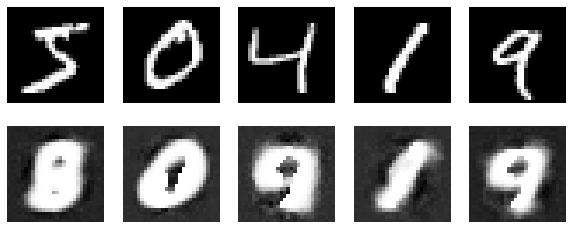

Epoch: 2/20 | Loss: 0.5288
Epoch: 3/20 | Loss: 0.5104
Epoch: 4/20 | Loss: 0.5453
Epoch: 5/20 | Loss: 0.5214
Epoch: 6/20 | Loss: 0.4798


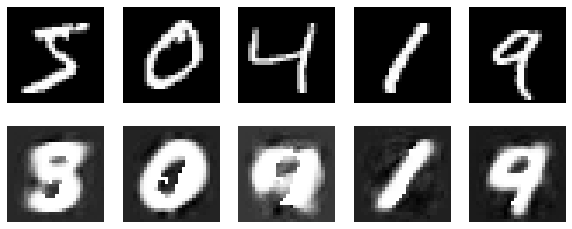

Epoch: 7/20 | Loss: 0.4705
Epoch: 8/20 | Loss: 0.5218
Epoch: 9/20 | Loss: 0.5059
Epoch: 10/20 | Loss: 0.4782
Epoch: 11/20 | Loss: 0.4890


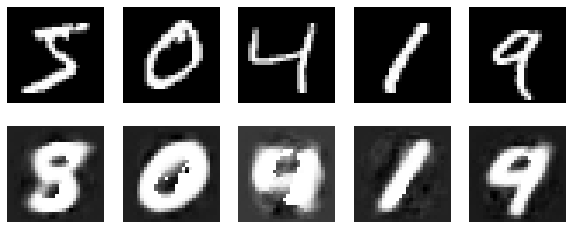

Epoch: 12/20 | Loss: 0.4555
Epoch: 13/20 | Loss: 0.4523
Epoch: 14/20 | Loss: 0.4600
Epoch: 15/20 | Loss: 0.5116
Epoch: 16/20 | Loss: 0.4685


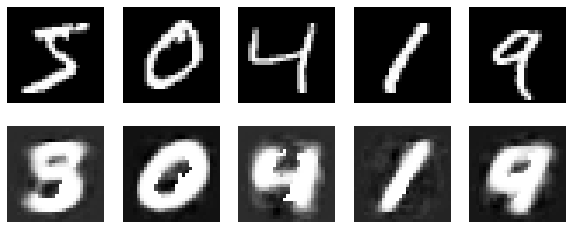

Epoch: 17/20 | Loss: 0.4492
Epoch: 18/20 | Loss: 0.5449
Epoch: 19/20 | Loss: 0.4510
Epoch: 20/20 | Loss: 0.4735


In [28]:
autoencoder = AutoEncoder(nn.Tanh())
autoencoder.to(DEVICE)

optimizer = torch.optim.Adam(autoencoder.parameters(), weight_decay=1e-5)
loss_func = nn.MSELoss()

view_data = Variable(train_data.data[:NB_TEST_IMG].view(-1, 28*28).type(torch.cuda.FloatTensor))

train(autoencoder, train_loader, view_data, loss_func)

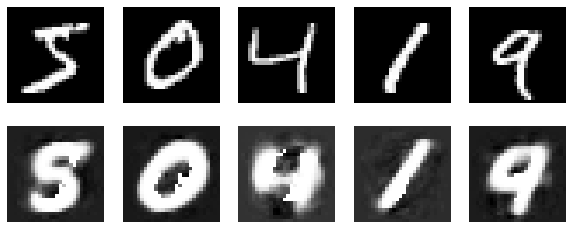

In [29]:
plot_img(autoencoder, view_data)